In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the file to Python environment**

In [2]:
data_cust = pd.read_csv('/content/customer.csv')
data_order = pd.read_csv('/content/orders.csv')

In [3]:
data_cust.head()

,customer_id,first_name,last_name,email,phone_number,address,city,state,zip_code,country
0,1,Ruhuma,Jacob,rjacob@gmail.com,2365651254,Richard st,Thrissur,Kerala,689103,INDIA
1,2,Sarah,James,james@gmail.com,1254365241,joy villa,Coimbatore,Tamil Nadu,641012,INDIA
2,3,Siju,Joy,joy@gmail.com,8145698547,"bhavan,",Chennai,Tamil Nadu,641035,INDIA
3,4,Mathew,ile,ile@gmail.com,9456852145,"sitara home,thrissur",Thrissur,Kerala,689121,INDIA
4,5,Sherin,Mathew,mathew90@gmail.com,8456259994,34 main street,Trivandrum,Kerala,689121,INDIA


In [4]:
data_order.head()

,order_id,customer_id,order_date,product_id,quantity,total_price,shipping_address,shipping_city,shipping_state,shipping_zip_code,shipping_country
0,1,14,12-Dec-23,23,2,$100,raj bhavan,Thiruvalla,Kerala,689121,INDIA
1,2,14,12-Dec-23,122,1,$56.21,raj bhavan,Thiruvalla,Kerala,689122,INDIA
2,3,14,12-Dec-23,25,2,$56.21,raj bhavan,Thiruvalla,Kerala,689123,INDIA
3,4,14,12-Dec-23,156,3,$21.00,raj bhavan,Thiruvalla,Kerala,689124,INDIA
4,5,14,12-Dec-23,111,2,$50.00,raj bhavan,Thiruvalla,Kerala,689125,INDIA


**Merge the csv files**

In [5]:
#joining Customer and ORder data on Customer_od
merged_df = pd.merge(data_cust, data_order, on='customer_id')

**No.of orders per customer**

In [23]:
merged_df.head()

,customer_id,first_name,last_name,email,phone_number,address,city,state,zip_code,country,order_id,order_date,product_id,quantity,total_price,shipping_address,shipping_city,shipping_state,shipping_zip_code,shipping_country
0,8,Sita,Dileep,dileep@gmail.com,8568211000,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA,32,20-Dec-23,84,3,300.0,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA
1,8,Sita,Dileep,dileep@gmail.com,8568211000,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA,33,20-Dec-23,58,2,133.0,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA
2,8,Sita,Dileep,dileep@gmail.com,8568211000,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA,34,3-Jan-24,23,1,50.0,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA
3,8,Sita,Dileep,dileep@gmail.com,8568211000,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA,35,3-Jan-24,44,21,20.0,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA
4,8,Sita,Dileep,dileep@gmail.com,8568211000,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA,36,3-Jan-24,20,21,52.0,kuttapuzha,Chennai,Tamil Nadu,641035,INDIA


In [41]:
merged_df['Customer Name'] = merged_df['first_name'] +' ' + merged_df['last_name']

In [42]:
# Count the number of orders per customer
orders_per_customer = merged_df.groupby(['customer_id','Customer Name'])['order_id'].count().reset_index(name='No. of Orders')

# Rename the column
orders_per_customer = orders_per_customer.rename(columns={'customer_id':'Customer Id'})

In [43]:
orders_per_customer

,Customer Id,Customer Name,No. of Orders
0,8,Sita Dileep,5
1,14,Javed Khan,13
2,18,Liza Pinto,16
3,22,catherin Solomon,3
4,23,Jace Richars,8
5,35,Euro Jose,2
6,40,Merin David,12
7,46,Holly Hortart,9
8,49,Stein Hudson,2


**Top 5 Users who places maximum amount of orders**

In [53]:
# Calculate the total amount per customer
total_amount_per_customer = merged_df.groupby(['customer_id','Customer Name'])['total_price'].sum().reset_index(name='total_amount')

In [54]:
# Extract numbers from the 'price' column
merged_df['total_price'] = merged_df['total_price'].replace('[\$,]', '', regex=True).astype(float)

In [55]:
sorted_totalcost = total_amount_per_customer.sort_values(by='total_amount',ascending=False)
sorted_totalcost.head()

,customer_id,Customer Name,total_amount
1,14,Javed Khan,1184.42
7,46,Holly Hortart,1085.00
2,18,Liza Pinto,914.62
6,40,Merin David,569.60
0,8,Sita Dileep,555.00


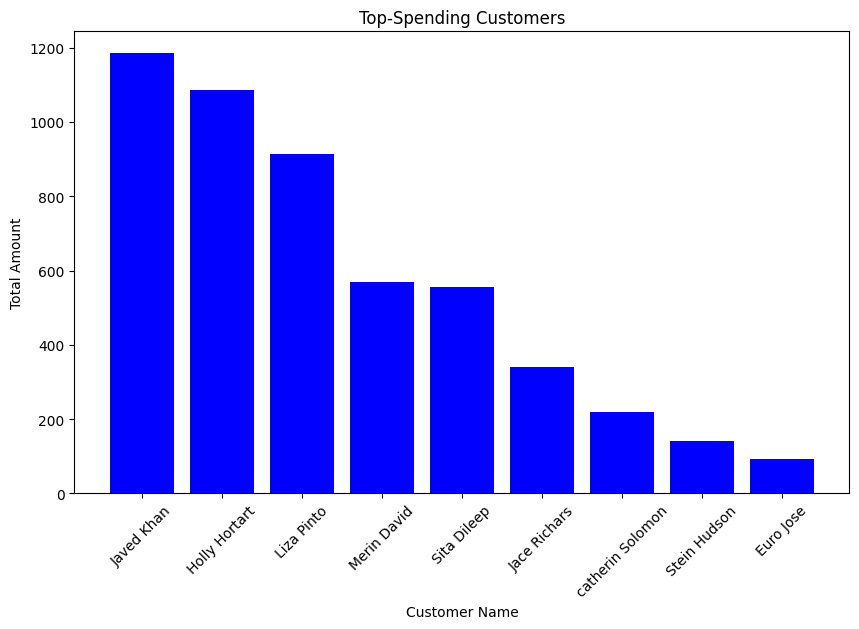

In [58]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_totalcost['Customer Name'], sorted_totalcost['total_amount'], color='blue')
plt.title('Top-Spending Customers')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.show()

**Average sales per day**

In [24]:
# Calculate the total amount per customer
Average_amount_per_day = merged_df.groupby('order_date')['total_price'].mean().reset_index(name='Average Sales')

In [25]:
Average_amount_per_day

,order_date,Average Sales
0,10-Jan-24,46.000000
1,11-Jan-24,200.000000
2,12-Dec-23,57.513333
3,13-Dec-23,51.800000
4,15-Dec-23,69.880000
5,17-Dec-23,50.055000
6,20-Dec-23,174.375000
7,3-Jan-24,53.333333
8,4-Jan-24,65.000000
9,5-Jan-24,50.000000


# Plot the time series graph Average Sales per Day

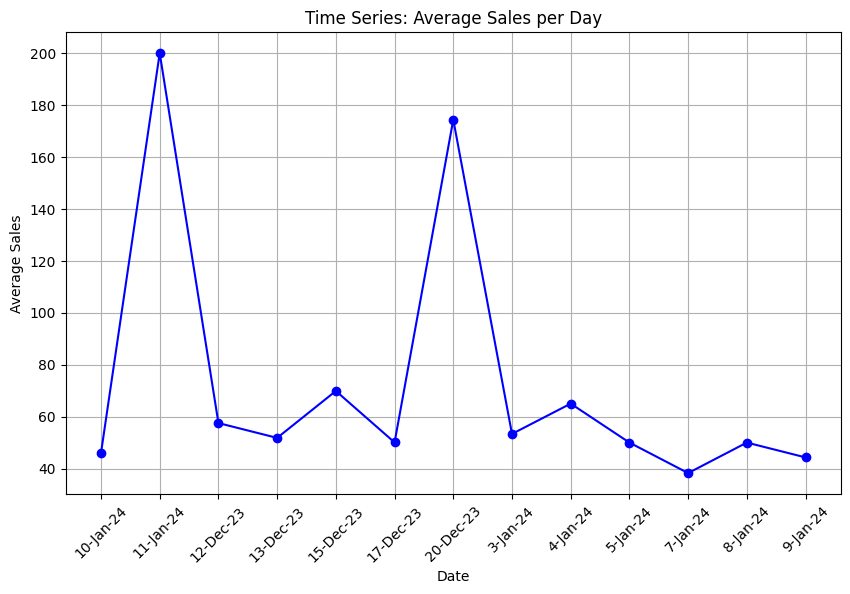

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(Average_amount_per_day['order_date'], Average_amount_per_day['Average Sales'], marker='o', linestyle='-', color='b')
plt.title('Time Series: Average Sales per Day')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

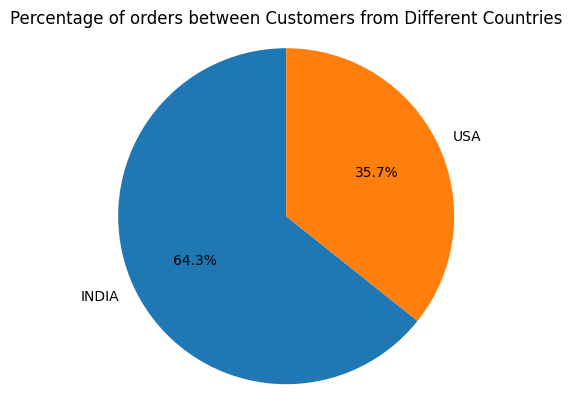

In [36]:
# Count the occurrences of the two types of Spending Level
category_counts = merged_df['country'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title('Percentage of orders between Customers from Different Countries')
# Display the plot
plt.show()